## EDA on Crop  RECOMMENDATION USING WEATHER AND SOIL CONTENT</center>
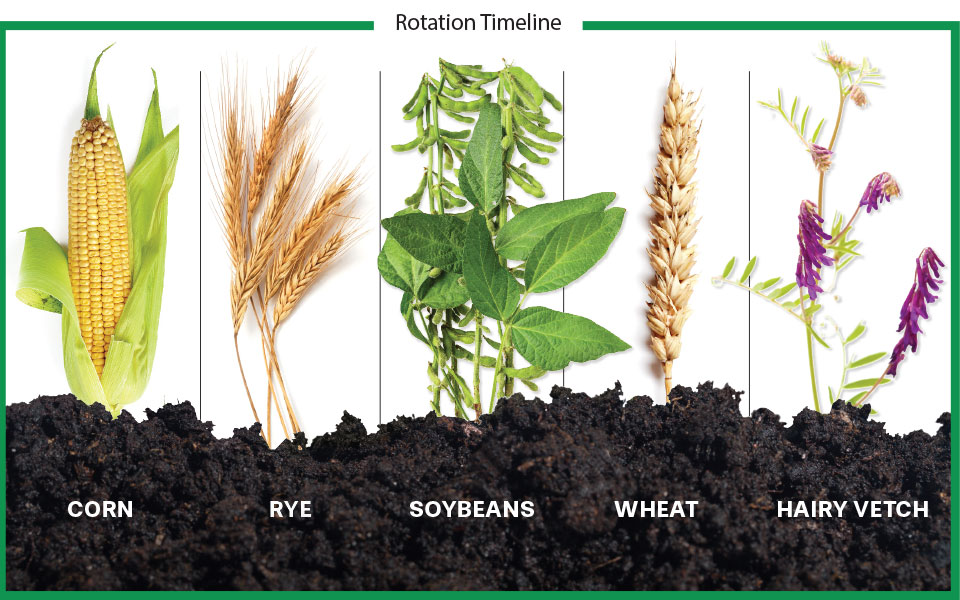

## What is EDA?
EDA stands for Exploratory Data Analysis. It is an approach used in data science and statistics to summarize, visualize, and understand the main characteristics, patterns, and relationships present in a dataset. The primary goal of EDA is to gain insights into the data and to uncover potential patterns or anomalies that might not be immediately apparent.

### EDA involves a variety of techniques and methods, including:

- Summary Statistics: Calculating basic statistics such as mean, median, mode, standard deviation, and percentiles to understand the central tendency and variability of the data.

- Data Visualization: Creating graphs, charts, and plots to visually represent the data. Common types of visualizations include histograms, scatter plots, box plots, bar charts, and heatmaps.

- Distribution Analysis: Examining the distribution of variables to understand their shape, skewness, and spread. This helps identify potential outliers and anomalies.

- Correlation Analysis: Investigating the relationships between different variables to understand how they are related and whether there are any strong correlations or dependencies.

- Data Cleaning and Preprocessing: Identifying missing values, outliers, and inconsistencies in the data and deciding how to handle them before further analysis.

- Feature Engineering: Exploring ways to create new features or transformations of existing features that might better capture the underlying patterns in the data.

- Hypothesis Generation: Formulating initial hypotheses about the relationships between variables and then using EDA to validate or disprove these hypotheses.



## 1. Exploratory Data Analysis (EDA) Case Study Questions
## Distribution Analysis:

- What is the distribution of N, P, and K values across all crops?
- How does the temperature vary for different crops, and what is its range?
### Relationship Analysis:

- Is there a correlation between N, P, and K values? What about their correlation with other variables like temperature, humidity, ph, and rainfall?
- How do temperature and humidity influence rainfall levels?

### Descriptive Statistics:

- What are the minimum, maximum, mean, median, and standard deviation values for each feature (like N, P, K, temperature, humidity, ph, and rainfall)?

### Crop-Specific Analysis:

- Which crop grows best in high temperature conditions?
- What is the average ph level preferred by crops like rice, wheat, and maize?
- How does the label (crop type) vary with rainfall values?

### Outlier Detection:

- Are there any outliers in features like N, P, K, temperature, ph, or rainfall?
- Which crops or rows have the highest or lowest values across different features?

### Environmental Factor Impacts:

- What range of humidity is observed for each crop?
- How does ph influence crop type or label?

### Cluster Analysis:

- Can crops be grouped based on similar N, P, and K requirements?
- Which crops have similar environmental requirements (in terms of temperature, humidity, rainfall, and ph)?

### 2. Data Modeling Case Study Questions
### Feature Engineering:

- How can you create features or transform existing ones to improve crop recommendation accuracy?
- Can interaction terms between N, P, K, temperature, and humidity be useful for modeling?

### Target Variable Analysis:

- How many unique crops are present in the label column, and what are their frequencies?
- Is there any class imbalance in the label (crop type), and how might it affect model performance?

### Model Selection:

- What types of machine learning models could be effective for predicting crop recommendations based on the given features?
Should classification or regression approaches be used for this problem, and why?

### Model Evaluation:

- What metrics will you use to evaluate the model's performance, and why?
- How will you ensure that the model is generalizable to unseen data?

### Feature Importance:

- After training, which features contribute most to the model's prediction of the crop type?
- Does N, P, K, temperature, or humidity have a higher weight in determining the recommended crop?

### Hyperparameter Tuning:

- What hyperparameters will you tune for your chosen model, and how will they impact the results?
- Would you consider using techniques like Grid Search or Random Search, and why?
### Data Preprocessing:

- Are there any features that need scaling or normalization (like temperature or ph)?
- Will you handle outliers or missing values differently for modeling compared to EDA?



## Why EDA

- An approach to summarize, visualize, and become intimately familiar with the important characteristics of a data set.
- Defines and Refines the selection of feature variables that will be used for machine learning.
- Helps to find hidden Insights
- It provides the context needed to develop an appropriate model with minimum errors

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("crop_recommendation.csv")
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [3]:
df.shape

(2200, 8)

In [4]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Insights:
- We have total observations for 22 crops 




## Let us check for null value

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### Insight:

- There are no null values in my data

## Statistical Description using Pandas

In [6]:
## To Check statistical properties of Numerical data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Insights:
- Mean of Nitrogen used by given sets of crops is 51 approx
- Mean of Phosphorus used by given sets of crops is 53 approx
- Mean of Potassiun used by given sets of crops is 48 approx
- Mean temperature is 25.6 that means a moderate temperature is facvorable for given set of crops


In [7]:
#To Check statistical properties of Categorical data
df.describe(include="object")

,label
count,2200
unique,22
top,rice
freq,100


### We have total 22 Crops in out data and all crops in 100 data points

In [8]:
c = pd.value_counts(df.label).to_frame().reset_index()
c.head(22)

,label,count
0,rice,100
1,maize,100
2,jute,100
3,cotton,100
4,coconut,100
5,papaya,100
6,orange,100
7,apple,100
8,muskmelon,100
9,watermelon,100


## Visualization Part

- ## Total number of crops and their average suitable temp

## Bar plot
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories.



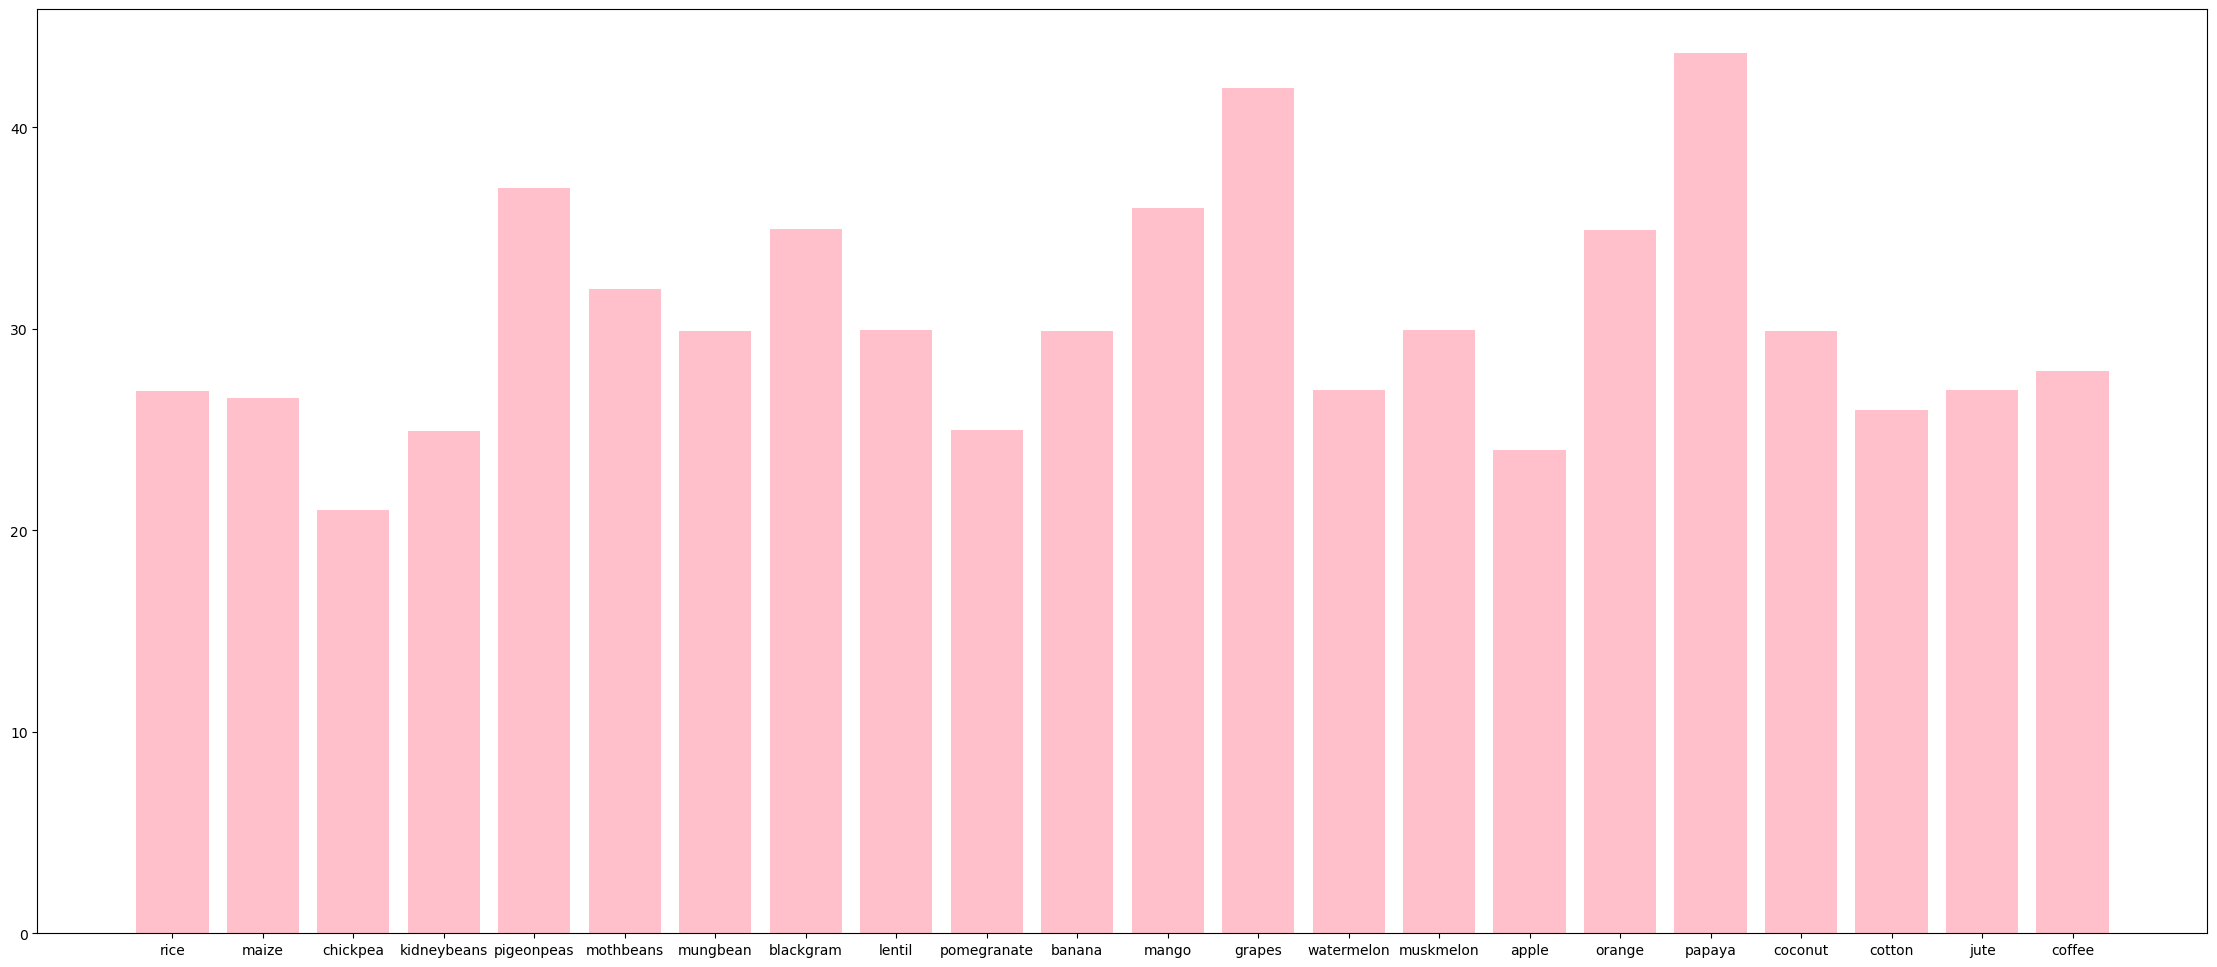

In [9]:
fig = plt.figure(figsize =(28, 12))
 
# Horizontal Bar Plot
plt.bar(df['label'], df['temperature'],color ="pink")
 
# Show Plot
plt.show()

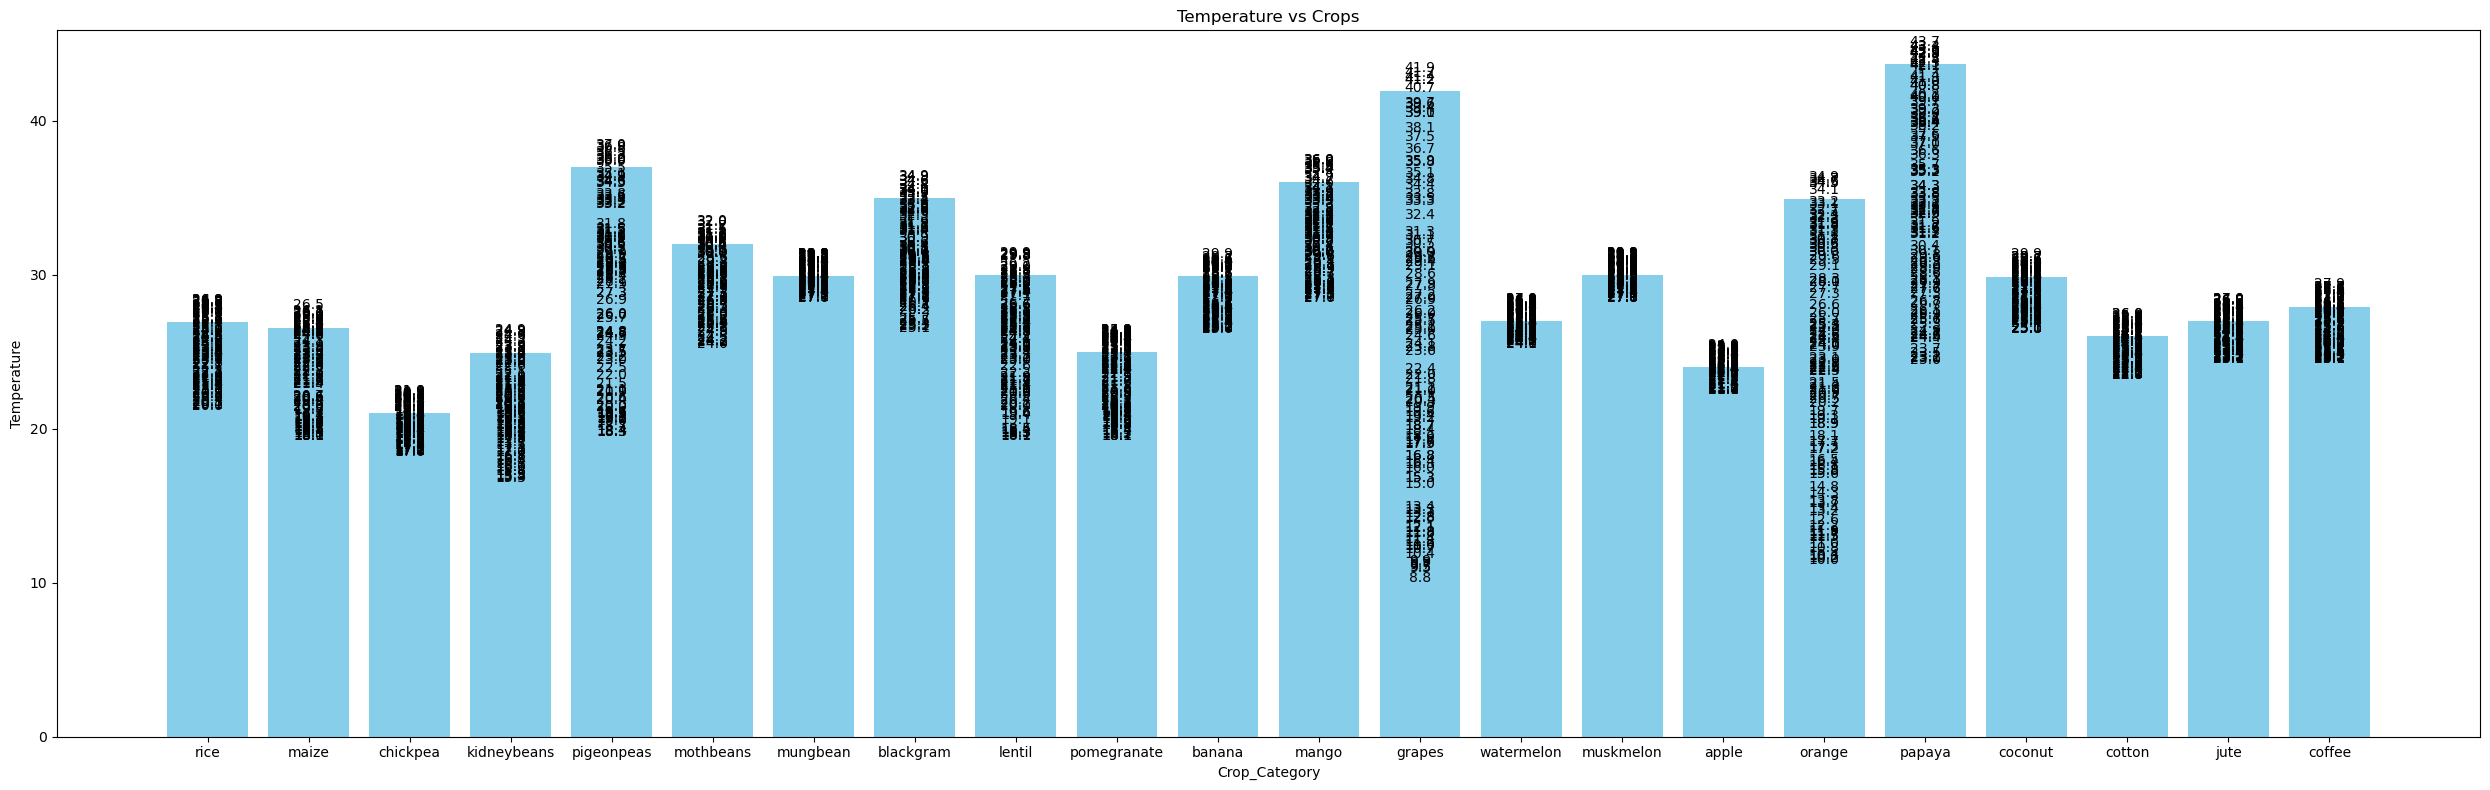

In [10]:
plt.figure(figsize=(25, 8))  # Set the figure size


# Create the bar plot
bars = plt.bar(df['label'], df['temperature'], color='skyblue')

# Add annotations above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Crop_Category')
plt.ylabel('Temperature')
plt.title('Temperature vs Crops')

# Show the plot
plt.tight_layout()
plt.show()


In [13]:

# Calculate mean temperature for each label
mean_temperatures = df.groupby('label')['temperature'].mean().reset_index()
mean_temperatures

,label,temperature
0,apple,22.630942
1,banana,27.376798
2,blackgram,29.973340
3,chickpea,18.872847
4,coconut,27.409892
5,coffee,25.540477
6,cotton,23.988958
7,grapes,23.849575
8,jute,24.958376
9,kidneybeans,20.115085


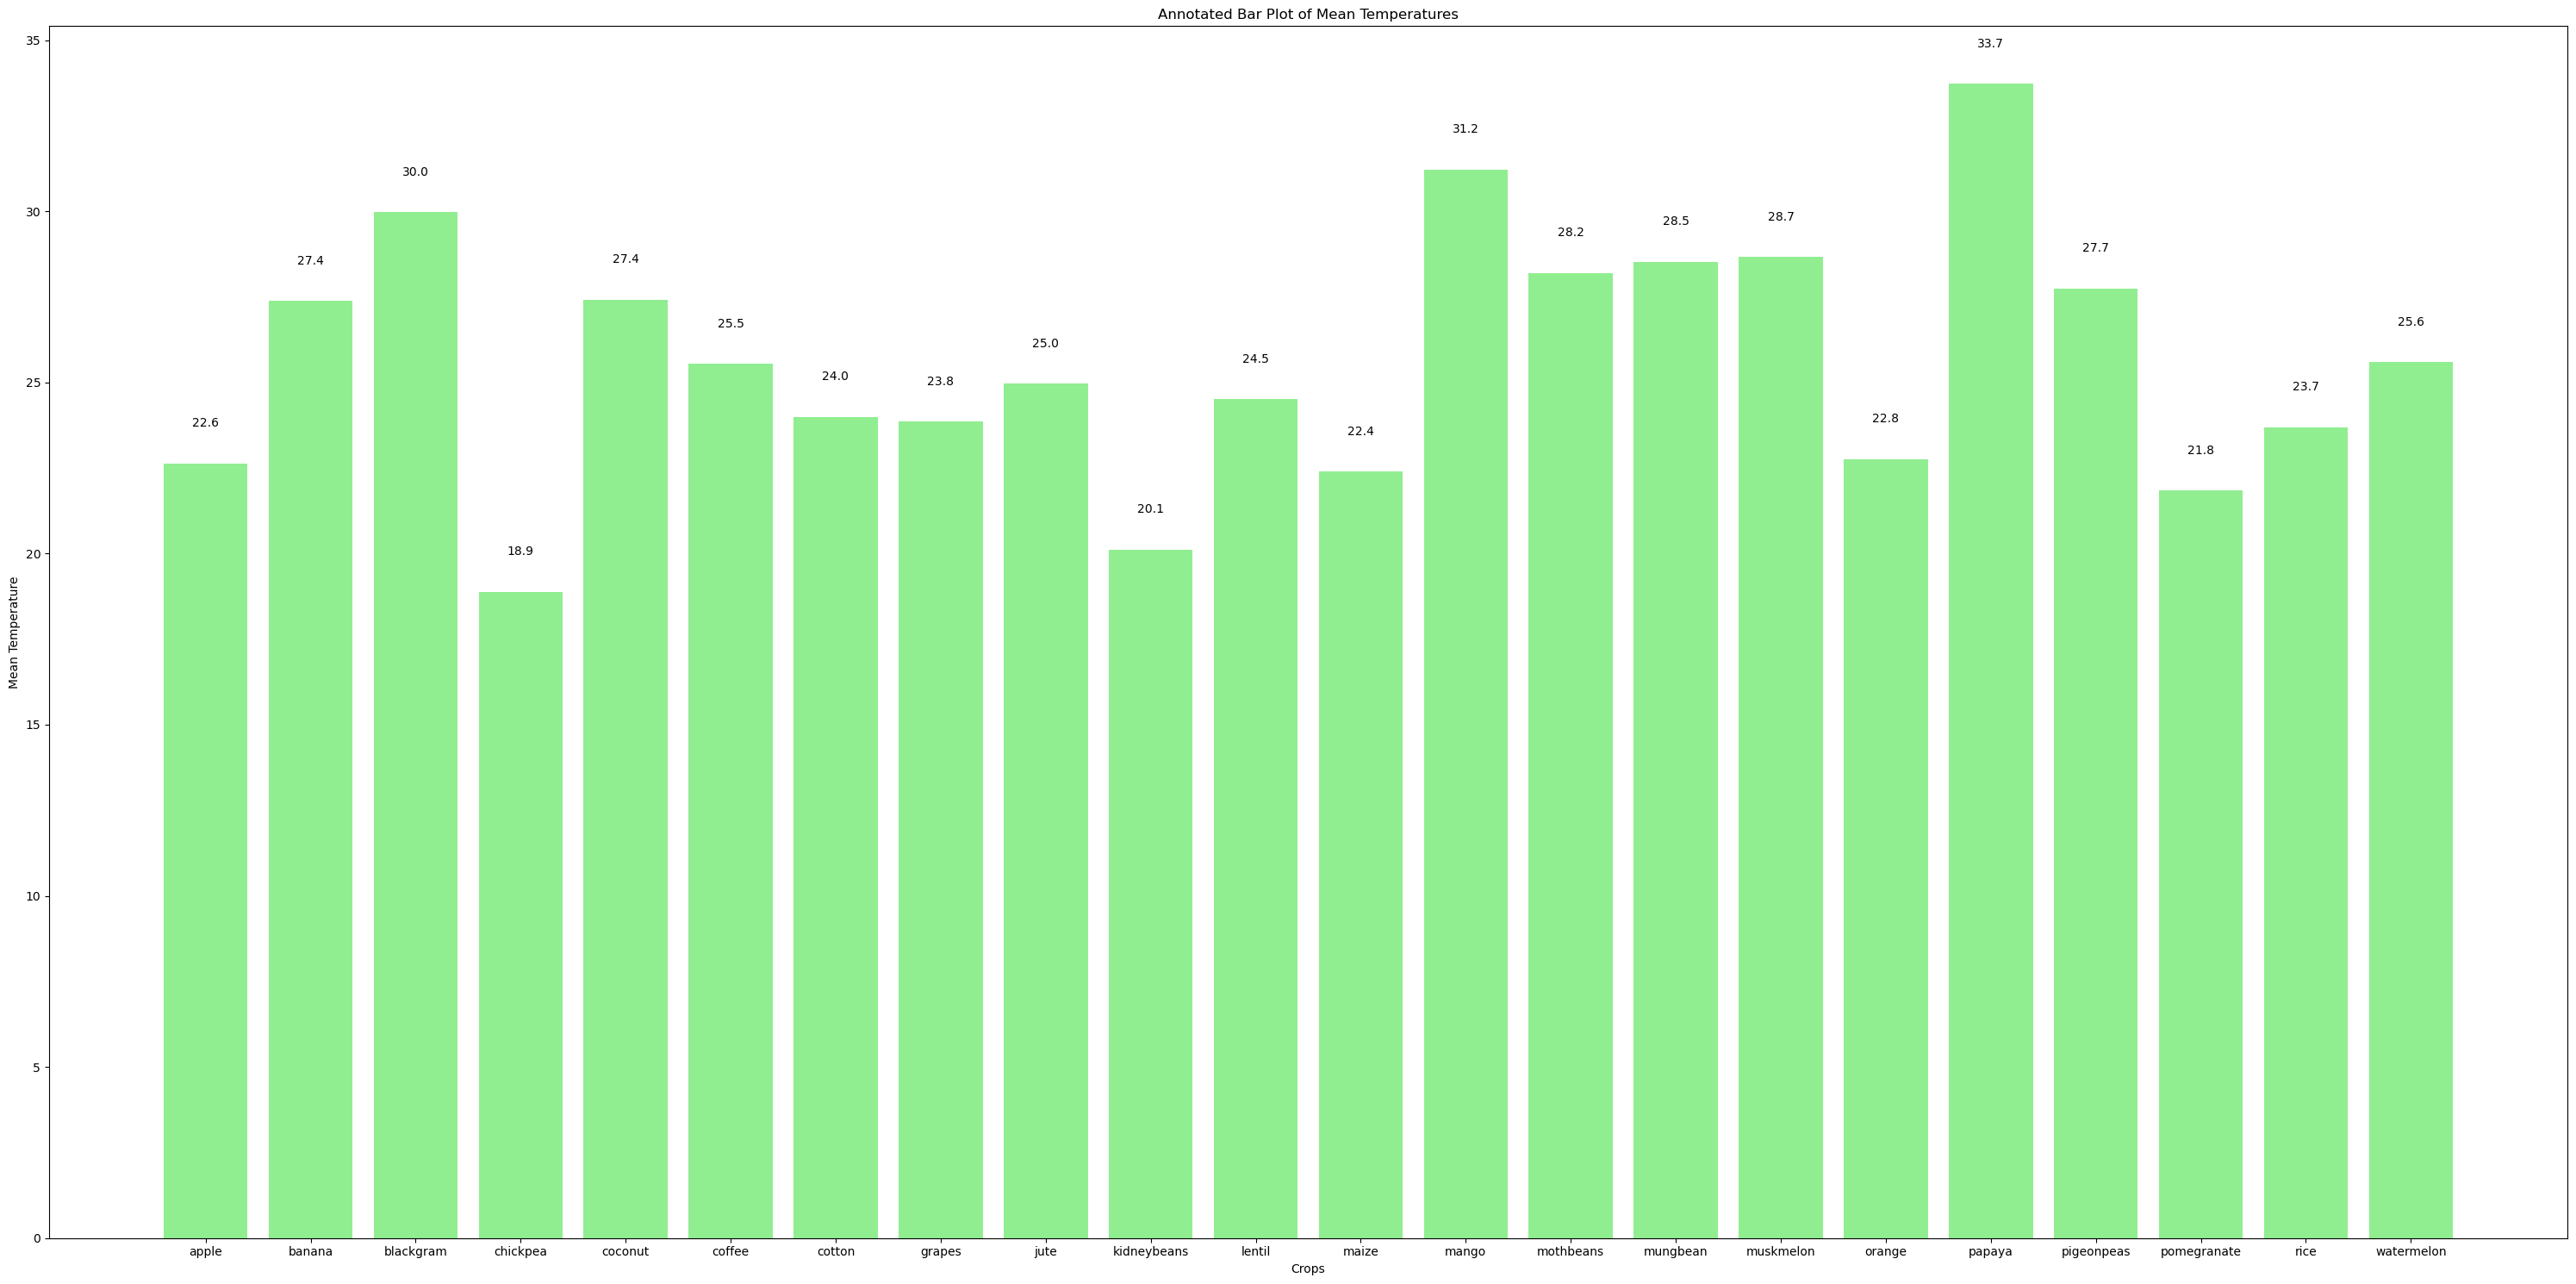

In [14]:

# Calculate mean temperature for each label
mean_temperatures = df.groupby('label')['temperature'].mean().reset_index()

plt.figure(figsize=(30, 15))  # Set the figure size

# Create the bar plot
bars = plt.bar(mean_temperatures['label'], mean_temperatures['temperature'], color='lightgreen')

# Add annotations above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+1, f'{yval:.1f}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Crops')
plt.ylabel('Mean Temperature in Celsius')
plt.title('Annotated Bar Plot of Mean Temperatures')

# Show the plot
plt.tight_layout()
plt.show()


##  Distribution of temperature, humidity and ph.</u>
    
It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!</h4>

<Axes: xlabel='humidity', ylabel='Density'>

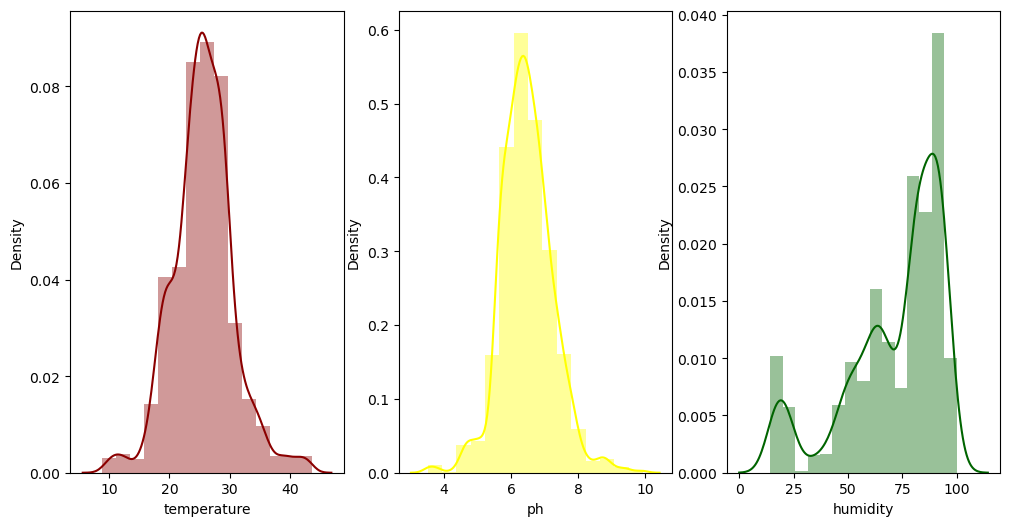

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
sns.distplot(df['temperature'],color="darkred",bins=15,hist_kws={'alpha':0.4})
plt.subplot(1, 3, 2)
sns.distplot(df['ph'],color="yellow",bins=15,hist_kws={'alpha':0.4})
plt.subplot(1, 3, 3)
sns.distplot(df['humidity'],color="darkgreen",bins=15,hist_kws={'alpha':0.4})

## Countplot
- Show value counts for a single categorical variable. If we use only one data 
- Show value counts for two categorical variables and using hue parameter


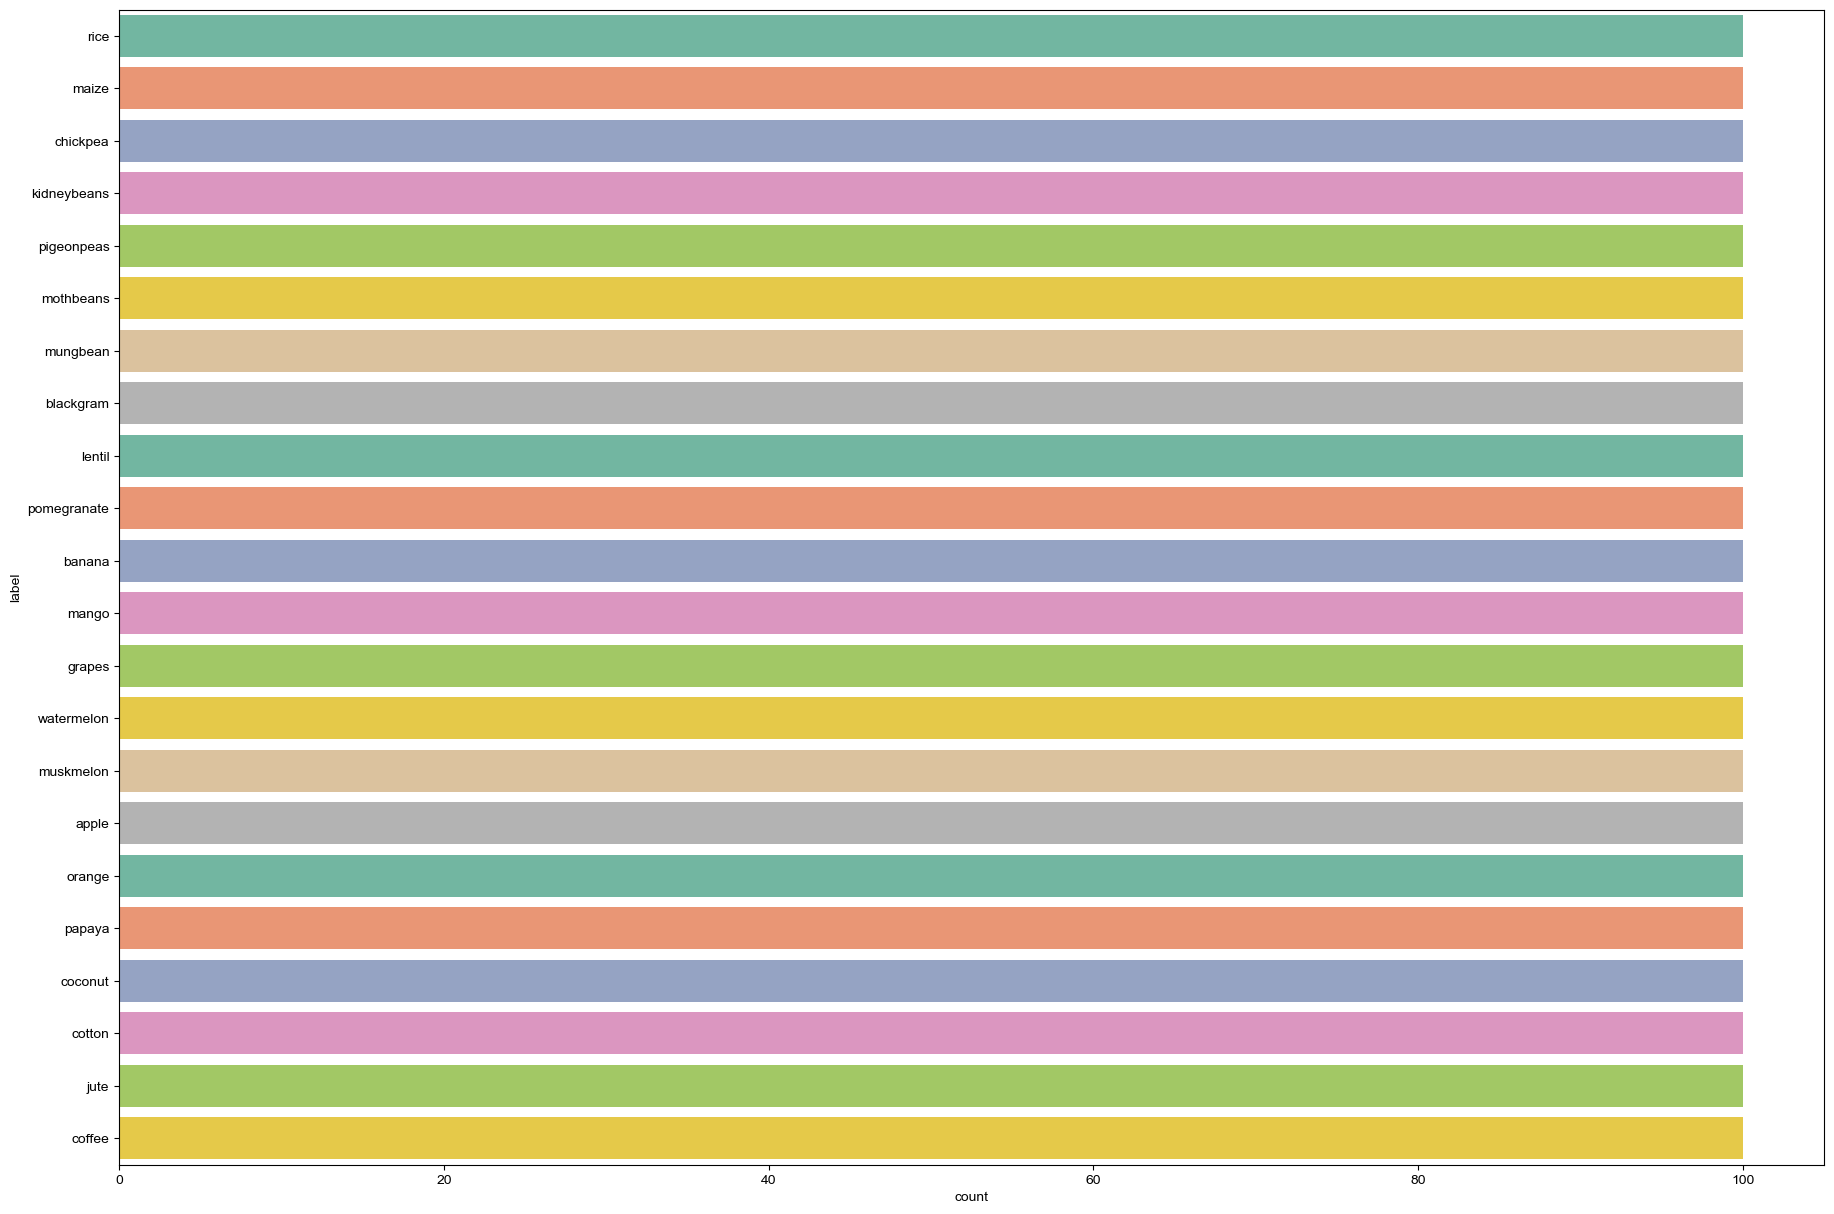

In [16]:
plt.figure(figsize=(22,15))
sns.countplot(y='label',data=df,palette = "Set2")
sns.set(rc = {'figure.figsize':(20, 8)})

## Pairplot
Pairplot can be used to visualize the relationship between continuous or categorical variables. It is a useful tool for exploratory data analysis and statistical graphics.

In [ ]:
plt.figure(figsize=(22,15))
sns.pairplot(df, hue = 'label')

### Insights:

#### During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

#### Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season. 

- <b> Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
- <b> Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

## Joint plots
Allow you to plot a relationship between two variables (also known as a bivariate relationship), while simultaneously exploring the distribution of each underlying variable.

## Check crops for which favorable temperature is greater than 35 and rainfall 130

In [ ]:

sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']>25) & (df['rainfall']>130)],hue="label")

## Insights
- **Papaya** and **PIGEONPEANS** grow at higher temperature and high rainfall

## Check crops for which favorable temperature is less than 30 and humdity less than 50

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['humidity']<50)],hue="label")

## Inisghts 
- Checkpea, kidney beans, Mango etc are the crops favorable at moderate soil temperature and humdity

In [ ]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

<h4>Let's try to plot a specfic case of pairplot between `humidity` and `K` (potassium levels in the soil.)</h4>

#### `sns.jointplot()` can be used for bivariate analysis to plot between humidity and K levels based on Label type. It further generates frequency distribution of classes with respect to features

In [ ]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7) 

#### We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

In [ ]:
sns.boxplot(y='label',x='ph',data=df)

## Box Plot
It is a type of chart that depicts a group of numerical data through their quartiles. It is a simple way to visualize the shape of our data.
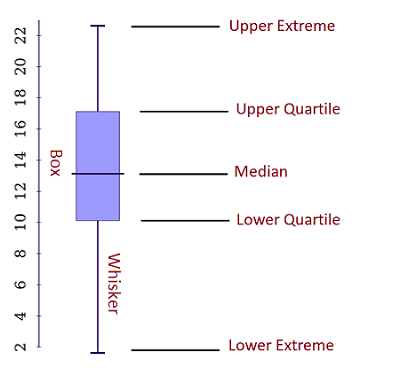

In [ ]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

#### Further analyzing phosphorous levels.

When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

## LinePlot

A line plot is a graphical representation of data on a number line using dots, crosses, or any other symbols

In [ ]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

## Insights

- Maize, chickpea, coffee etc need high  soil humidity
- Soil with Phosphorus content in range 12-25 is most suitable for most of the crops. provided we have good amount of moisture in soil

# DATA PRE-PROCESSING

### Let's make the data ready for machine learning model

In [ ]:
df

In [ ]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes
df['target']

In [ ]:
## Defining targets and features
y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

## Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated
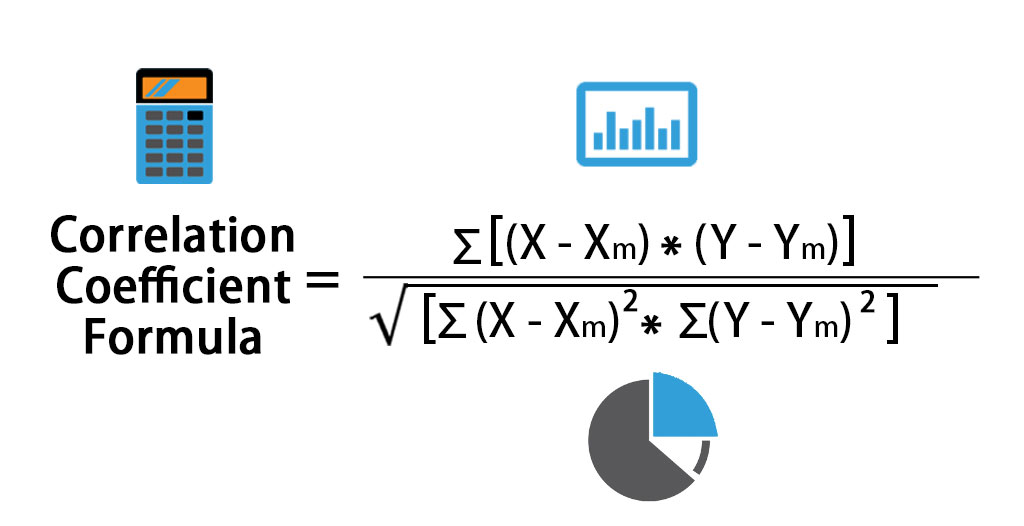

In [ ]:

plt.figure(figsize=(20, 5))
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- We will not consider Phosphorous and Pottasium together as they are correlated

In [ ]:
Test:
    
    Xtest, Ytest
    Ytest=Actual Values
    Xtest=Precicted
    
Train: Xtrain , Ytrain (Data Training  ): 80per
        
Actual - Predicted 
Xnew(), Correct Y values


# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

As we saw earlier, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)